In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
%matplotlib nbagg

In [18]:
#Model parameters
width = 10
bounce_loss = 0.9
g = -0.5
friction = 0.999


class Point:
    """A point class, containing a single point on a rope"""
    
    
    def __init__(self, x, y, prev_x, prev_y, fixed=False):
        #Current position
        self.x = x
        self.y = y
        
        #Previous position (for Verlet Integration)
        self.prev_x = prev_x
        self.prev_y = prev_y
        
        #Allowing for a fixed point:
        self.fixed = fixed
        
    def update(self):
        if self.fixed:
            return True
        
        #Find velocity from current position and last position
        vx = (self.x - self.prev_x) * friction
        vy = (self.y - self.prev_y) * friction
        
        #Update old positions
        self.prev_x, self.prev_y = self.x, self.y
        
        #Update new positions
        self.x += vx
        self.y += vy + g * dt
        
        #Check if the point has gone out of bounds
        if self.x > width:
            self.x = width
            self.prev_x = self.x + vx * bounce_loss
            
        if self.y > width:
            self.y = width
            self.prev_y = self.y + vy * bounce_loss
            
        if self.x < 0:
            self.x = 0
            self.prev_x = vx * bounce_loss
            
        if self.y < 0:
            self.y = 0
            self.prev_y = vy * bounce_loss
        

In [3]:
class Segment:
    """Forms the joints between points in a rope"""
    
    ######
    #I don't really know how to display these well, so they're staying invisible for now
    ######
    
    
    def __init__(self, start, end):
        #Defines the start, end and length of the segment
        
        #Start and end are pointers to the points
        self.start = start
        self.end = end
        
        #The length is the distance between the points, and will be kept constant
        self.length = np.sqrt((start.x - end.x)**2 + (start.y - end.y)**2)
    
    
    def update(self):
        #Find the distance between the start and end point, to see if this needs changing
        dx = self.end.x - self.start.x
        dy = self.end.y - self.start.y
        
        distance = np.sqrt(dx**2 + dy**2)
        
        #Find the discrepancy between the current length and the needed length
        difference = self.length - distance
        percent_difference = difference / distance / 2
        
        #Determine the movement of each point
        x_change = dx * percent_difference
        y_change = dy * percent_difference
        
        if self.start.fixed:
            #If the start is fixed, only the end can move
            self.end.x += x_change*2
            self.end.y += y_change*2
        
        else:
            #Correct the position of each point (if both are mobile)
            self.start.x -= x_change
            self.start.y -= y_change
        
            self.end.x += x_change
            self.end.y += y_change

In [4]:
def fix_constraints(points):
    
    for self in points:
        #Check if the point has gone out of bounds
        if self.x > width:
            self.x = width
            self.prev_x = self.x + vx * bounce_loss
            
        if self.y > width:
            self.y = width
            self.prev_y = self.y + vy * bounce_loss
            
        if self.x < 0:
            self.x = 0
            self.prev_x = vx * bounce_loss
            
        if self.y < 0:
            self.y = 0
            self.prev_y = vy * bounce_loss

In [5]:
def display(points):
    plt.scatter(points)

    
point1 = Point(5, 10, 5, 10, fixed=True)
point2 = Point(6, 9, 6, 9)
point3 = Point(7, 8, 7, 8)
point4 = Point(8, 7, 8, 7)
point5 = Point(9, 6, 9, 6)
    
    
points = [point1, point2, point3, point4, point5]

segments = [Segment(point1, point2),
            Segment(point2, point3),
            Segment(point3, point4),
            Segment(point4, point5)]

<IPython.core.display.Javascript object>


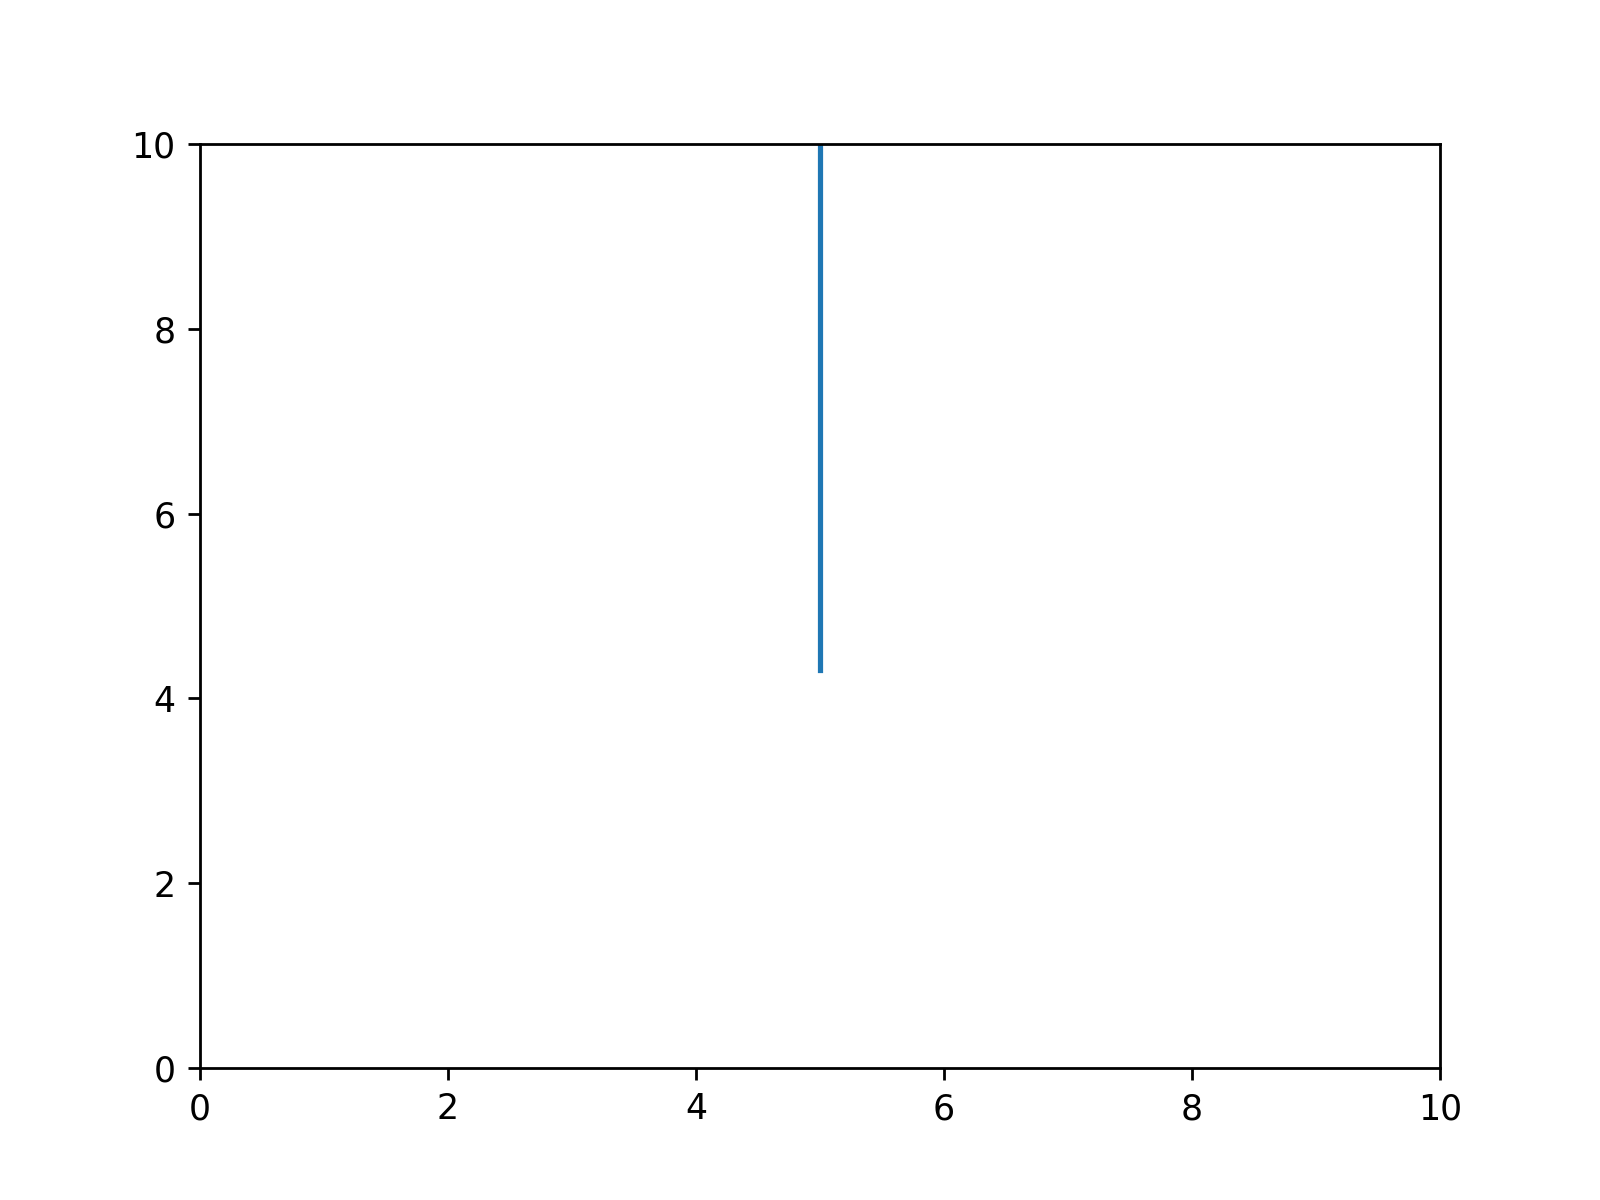

In [29]:
def display(points):
    plt.scatter(points)

    
point1 = Point(5, 10, 5, 10, fixed=True)
point2 = Point(6, 9, 6, 9)
point3 = Point(7, 8, 7, 8)
point4 = Point(8, 7, 8, 7)
point5 = Point(9, 6, 9, 6)
    
    
points = [point1, point2, point3, point4, point5]

segments = [Segment(point1, point2),
            Segment(point2, point3),
            Segment(point3, point4),
            Segment(point4, point5)]

dt = 1/80

#############################################

#Animation cell
fig, ax = plt.subplots()

ax.set_xlim(0, width)
ax.set_ylim(0, width)

def animate(i):    
    for ball in points:
        ball.update()    
    
    for segment in segments:
        segment.update()
    
    fix_constraints(points)
    
    #Update plot for animation
    lines.set_data(np.transpose([[p.x, p.y] for p in points]))
        
    return lines,

lines, = ax.plot(*np.transpose([[p.x, p.y] for p in points]))

#Create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=20000,
                                      interval=1000*dt, blit=True)

plt.show()

In [7]:
raise NotImplementedError

NotImplementedError: 

In [ ]:
#Animation cell
fig, ax = plt.subplots()
ax = plt.subplot(xlim = (0, width), ylim = (0, width))

def animate(i, points, segments, lines):
    positions = []
    
    for ball in points:
        ball.update()    
    
    for segment in segments:
        segment.update()
    
    fix_constraints(points)
    
    #Record final positions
    for ball in points:
        positions.append((ball.x, ball.y))
    
    #Update plot for animation
    for i in range(len(positions)):
        lines[i].set_data(positions[i][0], positions[i][1])
    return lines

#Create initial frame
lines = [None] * len(points)

for i in range(len(points)):
    lines[i], = ax.plot(points[i].x, points[i].y, marker = 'o') 

#Create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, fargs=[points, segments, lines], frames=np.arange(0,200),
                                      interval=1, blit=True, repeat=True)


plt.show()